# Polar Heatmap

In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata

from lets_plot import *


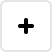
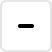
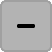
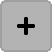
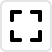
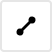
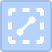
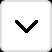
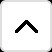
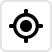
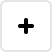
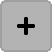
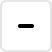
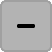
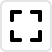
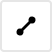
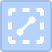
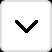
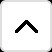
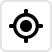

In [2]:
LetsPlot.setup_html()

In [3]:
max_r = 100
max_theta = 2.0 * np.pi
number_points = 5_000
np.random.seed(42)

grid_r, grid_theta = np.meshgrid(
    np.linspace(0, max_r, 200), # r
    np.linspace(0.0, max_theta, 100) # theta
)

points = np.random.rand(number_points, 2) * [max_r, max_theta]
values = points[:,0] * np.sin(points[:,1])**2 * np.cos(points[:,1])**2
data = griddata(points, values, (grid_r, grid_theta), method='cubic',fill_value=0)

df = {
    'x': grid_theta.flatten(), 
    'y': grid_r.flatten(), 
    'z': data.flatten()
}

p = ggplot(df) + \
    geom_tile(aes('x', 'y', color='z', fill='z'), size=1, tooltips='none') + \
    scale_brewer(['color', 'fill'], palette='Spectral', direction=-1) + \
    theme(axis_title=element_blank())

gggrid([
    p + coord_cartesian() + ggtitle("Rectangular Heatmap"),
    p + coord_polar() + theme(legend_position='none') + ggtitle("Polar Heatmap"),
])